## visualization for nodules -- ALM Ortho Powders

In [28]:
## import modules and libraries for visualization 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import os

In [27]:
import os
import pandas as pd
import re

# Path to the folder containing the CSV files
folder_path = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data'
output_path = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data/ImageJoutput.csv'

# Pattern to match filenames
pattern = r"(?P<Lot>P\d+) Group (?P<Group>\d+) Rev (?P<Rev>\d+)"

dataframes = []
unmatched_files = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        match = re.search(pattern, file_name)
        if match:
            # Extract Lot, Rev, and Group from the filename
            lot = match.group("Lot")
            group = int(match.group("Group"))
            rev = int(match.group("Rev"))
            
            # Full path to the file
            file_path = os.path.join(folder_path, file_name)
            
            try:
                # Read the CSV into a DataFrame
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
                
                # Check if the DataFrame is empty
                if df.empty:
                    print(f"Warning: {file_name} is empty and will be skipped.")
                    continue
                
                # Add new columns
                df['Lot'] = lot
                df['Rev'] = rev
                df['Group'] = group
                
                # Append the DataFrame to the list
                dataframes.append(df)
                print(f"Processed file: {file_name}, shape: {df.shape}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
        else:
            unmatched_files.append(file_name)

# Concatenate all DataFrames
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)
    print(f"Concatenation complete. Combined DataFrame shape: {final_df.shape}")
    
    # Save the final DataFrame to the specified file
    try:
        final_df.to_csv(output_path, index=False)
        print(f"Output saved to: {output_path}")
    except Exception as e:
        print(f"Error saving the output file: {e}")
else:
    print("No dataframes to concatenate.")

# List unmatched files
if unmatched_files:
    print("Unmatched files:")
    for file in unmatched_files:
        print(file)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data'

In [29]:
# import imagej 
imagej_nodules = pd.read_csv('/Users/sarah/Documents/Roux co-op/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data/ImageJoutput.csv')
flowcam_data = pd.read_csv('/Users/sarah/Documents/Roux co-op/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCam Ti64 Data/FlowCamoutput.csv')

/var/folders/27/_cqkc85s1rz_whsq2n2qsjjr0000gn/T/ipykernel_71603/1965729722.py:3: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  flowcam_data = pd.read_csv('/Users/sarah/Documents/Roux co-op/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCam Ti64 Data/FlowCamoutput.csv')


In [34]:
imagej_nodules['Rev'] = pd.to_numeric(imagej_nodules['Rev'], errors='coerce')
filtered_lots = ['P1444', 'P1440', 'P1442', 'P2328']
filtered_nodules = imagej_nodules[imagej_nodules['Lot'].isin(filtered_lots)]
Imagej_particle_count = filtered_nodules.groupby('Rev')['Count'].sum()
Imagej_particle_count = Imagej_particle_count.reindex(range(1, 11), fill_value=0)
Imagej_particle_count = Imagej_particle_count.tolist()

Imagej_particle_count


[1606, 1009, 112, 0, 2748, 4098, 4650, 6151, 3993, 2260]

In [35]:

selected_lots = ['P1444', 'P1442', 'P1440', 'P2328']

filtered_data = flowcam_data[flowcam_data['Lot'].isin(selected_lots)]


flowcam_particle_count = [filtered_data[filtered_data['Rev'] == rev].shape[0] for rev in range(1, 11)]
flowcam_particle_count


[1545, 965, 110, 0, 2708, 3960, 4575, 6048, 3871, 2214]

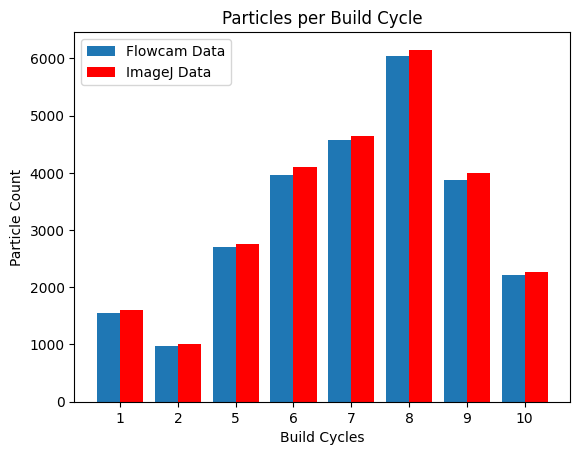

In [32]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Exclude 3 and 4
exclude = [3, 4]
X_filtered = [x for x in X if x not in exclude]
flowcam_filtered = [flowcam_particle_count[i] for i in range(len(X)) if X[i] not in exclude]
Imagej_filtered = [Imagej_particle_count[i] for i in range(len(X)) if X[i] not in exclude]

# X_axis for filtered data
X_axis = np.arange(len(X_filtered))

# Plot
plt.bar(X_axis - 0.2, flowcam_filtered, 0.4, label='Flowcam Data')
plt.bar(X_axis + 0.2, Imagej_filtered, 0.4, label='ImageJ Data', color='red')

plt.xticks(X_axis, X_filtered)
plt.xlabel('Build Cycles')
plt.ylabel('Particle Count')
plt.title('Particles per Build Cycle')
plt.legend()
plt.show()

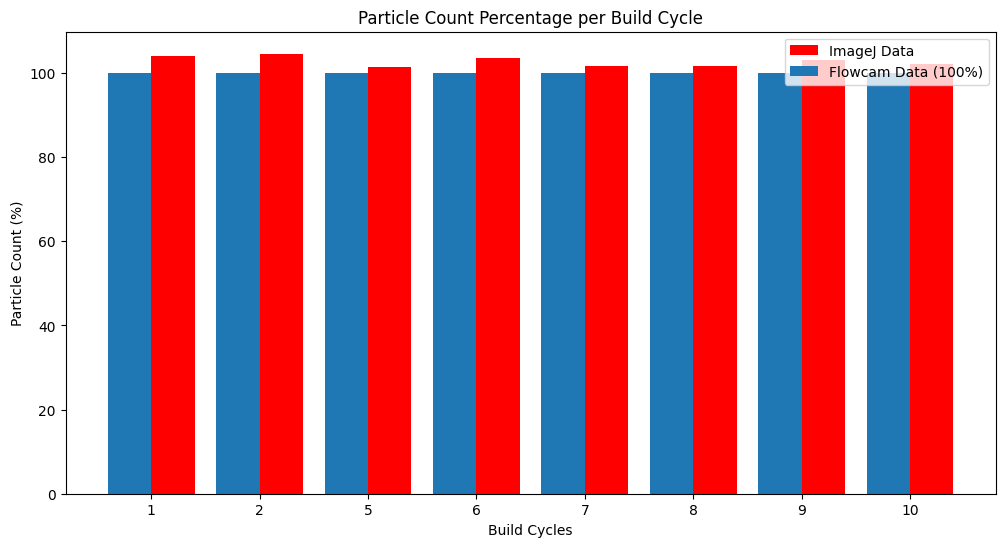

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Remove data for revisions 3 and 4
filtered_X = [x for i, x in enumerate(X) if x not in [3, 4]]
filtered_flowcam = [flowcam_particle_count[i] for i, x in enumerate(X) if x not in [3, 4]]
filtered_imagej = [Imagej_particle_count[i] for i, x in enumerate(X) if x not in [3, 4]]

# Calculate ImageJ particle count as percentage of Flowcam data
imagej_percentage = [(imagej / flowcam) * 100 if flowcam != 0 else 0 for imagej, flowcam in zip(filtered_imagej, filtered_flowcam)]

X_axis = np.arange(len(filtered_X))

# Create a larger figure
plt.figure(figsize=(12, 6))

plt.bar(X_axis + 0.2, imagej_percentage, 0.4, label='ImageJ Data', color='red')
plt.bar(X_axis - 0.2, np.ones(len(filtered_X)) * 100, 0.4, label='Flowcam Data (100%)')

plt.xticks(X_axis, filtered_X)
plt.xlabel('Build Cycles')
plt.ylabel('Particle Count (%)')
plt.title('Particle Count Percentage per Build Cycle')
plt.legend()
plt.show()


In [41]:
imagej_percentage = [round(value,2) for value in imagej_percentage]
imagej_percentage

[103.95, 104.56, 101.48, 103.48, 101.64, 101.7, 103.15, 102.08]

In [42]:
df = pd.DataFrame(
    {
    'build cycles': [1, 2, 5, 6, 7, 8, 9, 10],
    'flowcam particle counts': filtered_flowcam,
    'imagej particle counts': filtered_imagej,
    'imagej particle percentage of flowcam counts':imagej_percentage
    }
)
df

,build cycles,flowcam particle counts,imagej particle counts,imagej particle percentage of flowcam counts
0,1,1545,1606,103.95
1,2,965,1009,104.56
2,5,2708,2748,101.48
3,6,3960,4098,103.48
4,7,4575,4650,101.64
5,8,6048,6151,101.70
6,9,3871,3993,103.15
7,10,2214,2260,102.08
